In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
import pymannkendall as mk

# 00 settings

In [2]:
# path
res_path = 'D:/sorting/data/m009_1/'
print("res_path:", res_path)

# path
load_path = 'D:/sorting/data/m009_1/'
print("load_path:", res_path)

# parameters
duration = 10
calc_start, calc_end = 2250, 3750

bs_time_range = [2153,	2230,	2315,	2393,	2452,	2531,	2600,	2659,	2701,	2763,	2782,	2817,	2885,	3080]
ane_time_range =  [2115,	2191,	2275,	2367,	2425,	2505,	2576,	2638,	2680,	2748,	2763,	2798,	2865,	3062]

bs_ane_time_range = bs_time_range + ane_time_range
bs_ane_time_range.sort()
print("bs_ane_time_range:", len(bs_ane_time_range))

bs_time_idx = []
for i in bs_time_range:
    bs_time_idx.append(bs_ane_time_range.index(i))
print("bs_time_idx:", len(bs_time_idx), bs_time_idx[:5])   

ane_time_idx = []
for i in ane_time_range:
    ane_time_idx.append(bs_ane_time_range.index(i))
print("ane_time_idx:", len(ane_time_idx), ane_time_idx[:5])   

res_path: D:/sorting/data/m009_1/
load_path: D:/sorting/data/m009_1/
bs_ane_time_range: 28
bs_time_idx: 14 [1, 3, 5, 7, 9]
ane_time_idx: 14 [0, 2, 4, 6, 8]


# 01 load data

denoised_data: (8115, 9095)


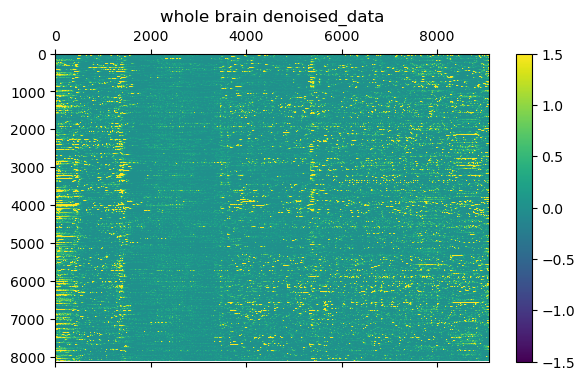

In [3]:
'''
calc data
'''
denoised_data = np.load(res_path + "neuron_denoised_records_whole_brain.npy")
print("denoised_data:", denoised_data.shape)

fig,ax = plt.subplots(figsize=(7,4), dpi=100,facecolor="w")
caxes = ax.matshow(denoised_data, vmin = -1.5, vmax = 1.5, cmap = "viridis", aspect = "auto")
fig.colorbar(caxes)
plt.title("whole brain denoised_data")
plt.show()

In [4]:
valid_neuron_x = pd.read_csv(load_path + "valid_neuron_x.csv")
print("valid_neuron_x:", type(valid_neuron_x), valid_neuron_x.shape)
valid_neuron_x = valid_neuron_x.values

valid_neuron_y = pd.read_csv(load_path + "valid_neuron_y.csv")
print("valid_neuron_y:", type(valid_neuron_y), valid_neuron_y.shape)
valid_neuron_y = valid_neuron_y.values


valid_neuron_x: <class 'pandas.core.frame.DataFrame'> (8115, 1)
valid_neuron_y: <class 'pandas.core.frame.DataFrame'> (8115, 1)


# 02 burst neurons

select_data_ids: 4733 <class 'numpy.ndarray'>


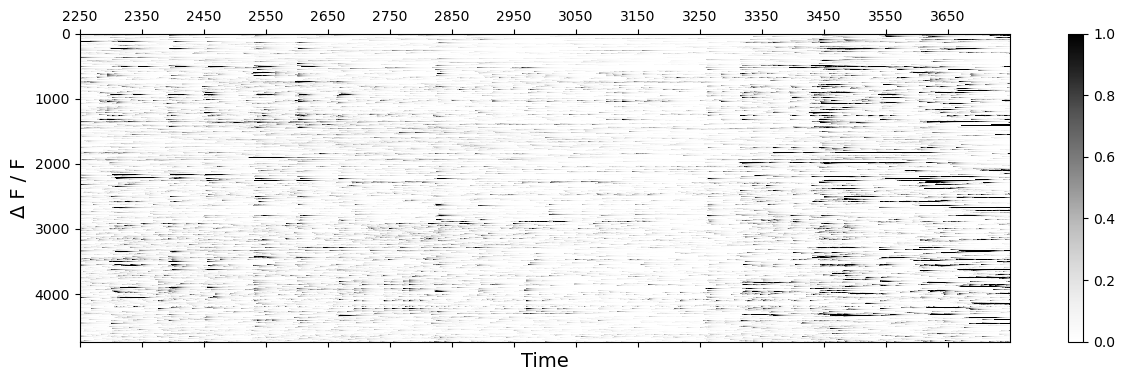

code_list: 4733
sort_id: 4733
sort_id: 4389
select_data_ids_sort: 4389
calc_rec: (4389, 1500)


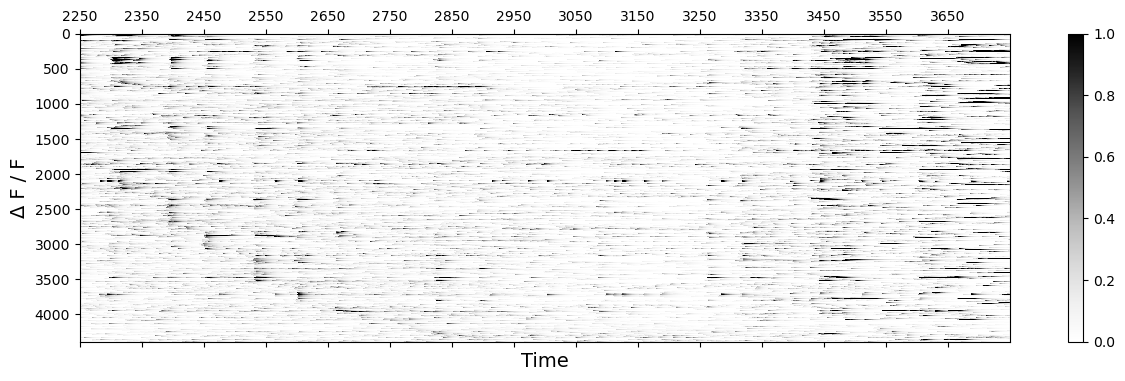

4389 28


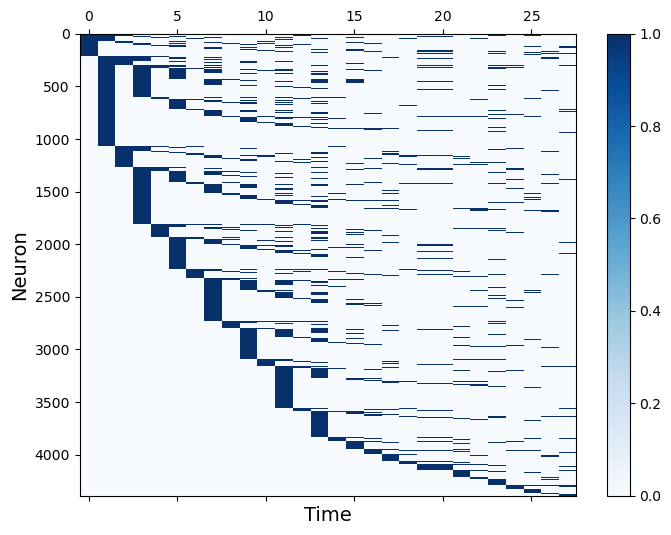

In [5]:
'''
burst neurons
'''
name = "burst"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort burst neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
'''
burst code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]
        
    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


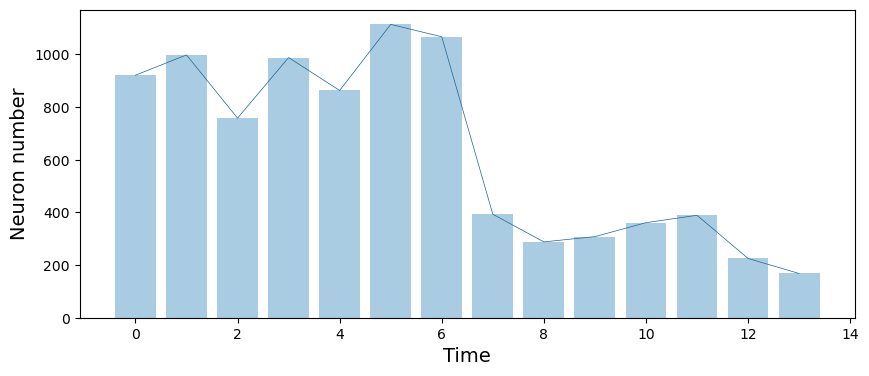

code_matrix_type_cnt length: 14
y: [0.2871467639015497, 0.24567000911577028, 0.1939380127620784, 0.12716499544211485, 0.06700091157702825, 0.03441203281677302, 0.02301731996353692, 0.009571558796718322, 0.005697356426618049, 0.0034184138559708297, 0.002051048313582498, 0.0006836827711941659, 0.00022789425706472196, 0.0]


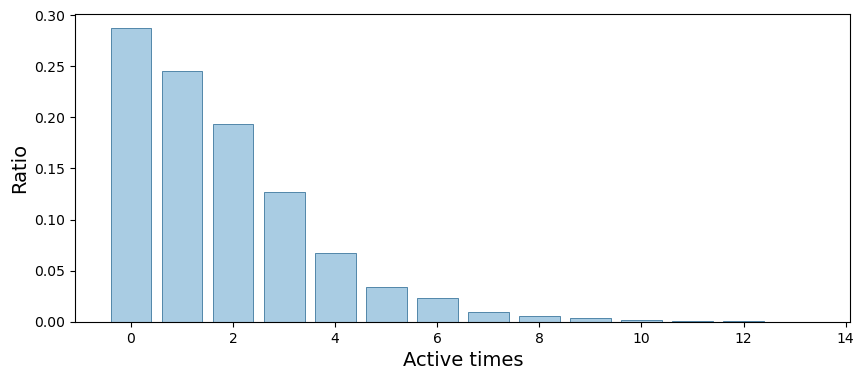

time 2153  -- selected neuron number: 921


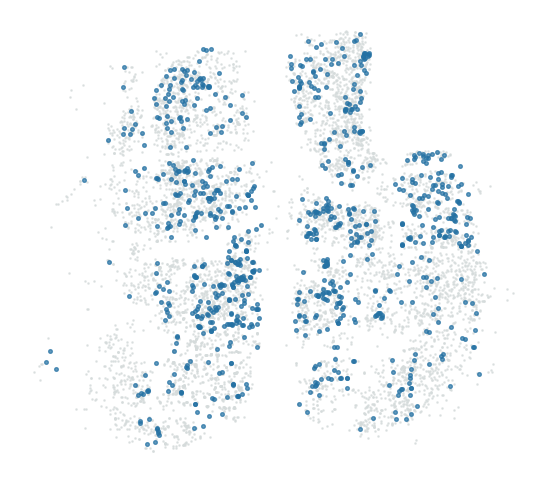

time 2230  -- selected neuron number: 998


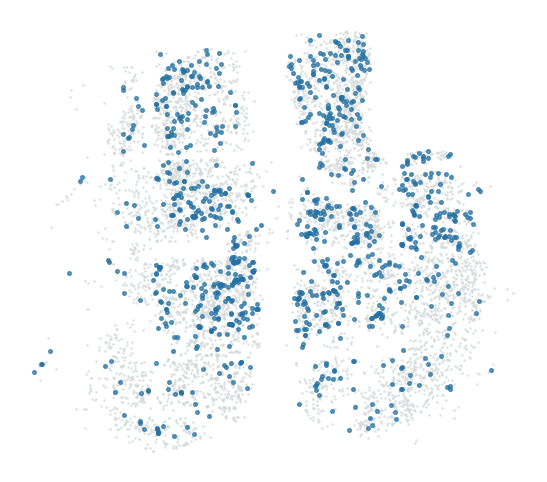

time 2315  -- selected neuron number: 758


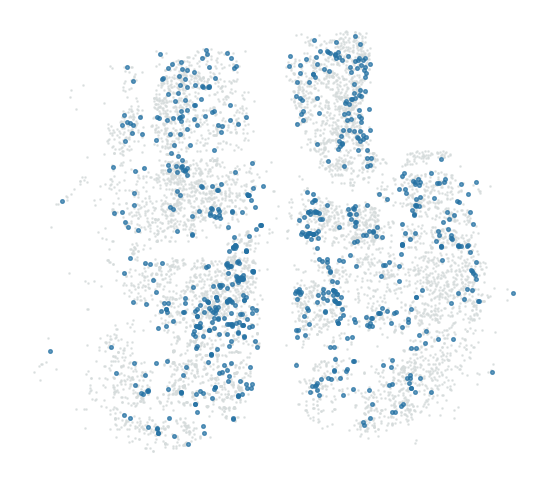

time 2393  -- selected neuron number: 988


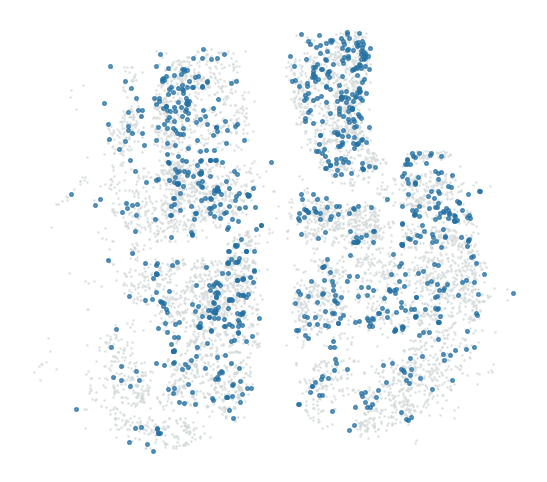

time 2452  -- selected neuron number: 863


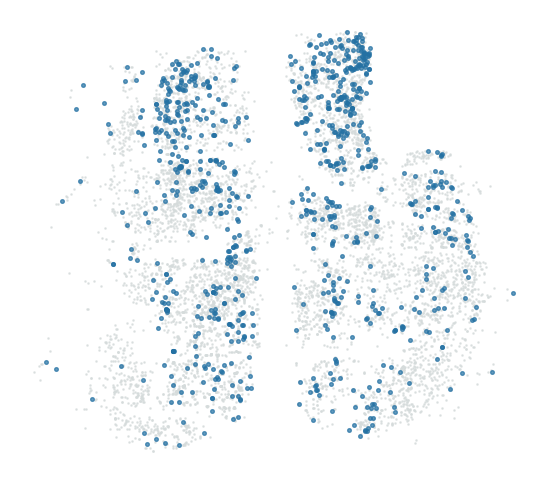

time 2531  -- selected neuron number: 1114


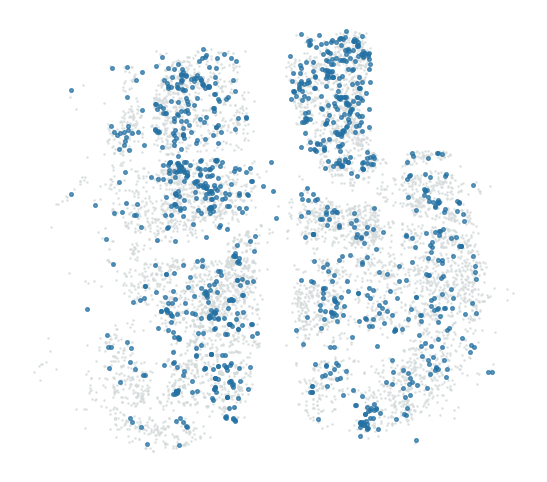

time 2600  -- selected neuron number: 1067


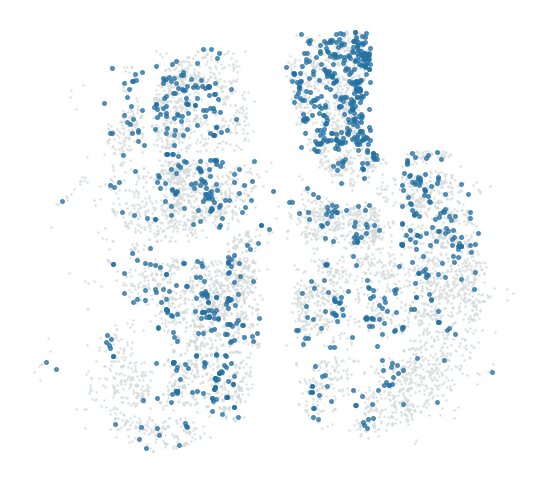

time 2659  -- selected neuron number: 393


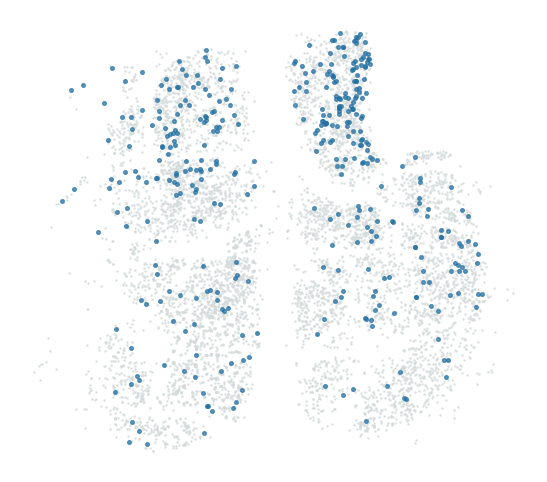

time 2701  -- selected neuron number: 288


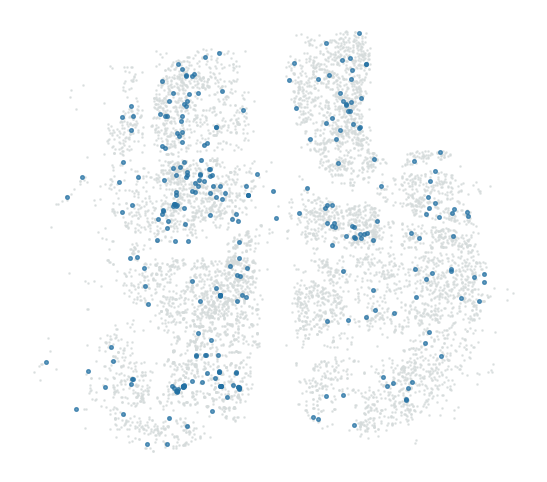

time 2763  -- selected neuron number: 308


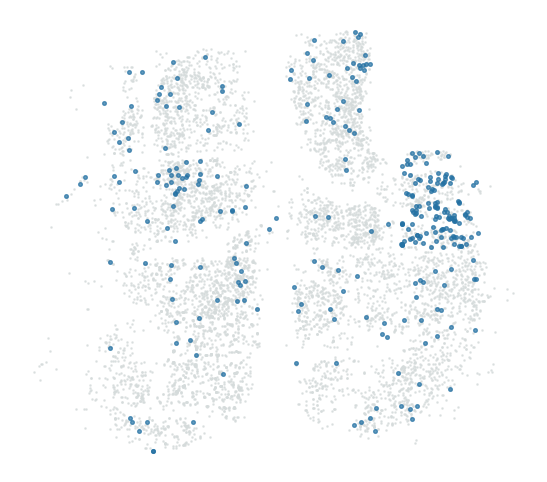

time 2782  -- selected neuron number: 361


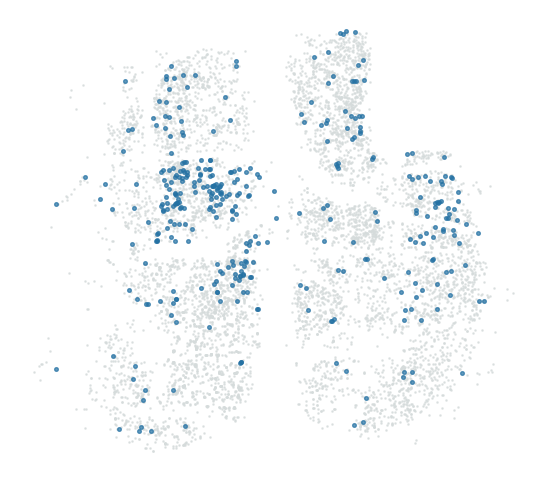

time 2817  -- selected neuron number: 389


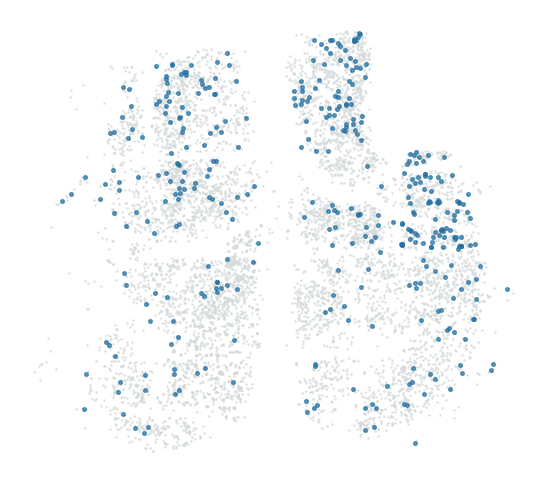

time 2885  -- selected neuron number: 225


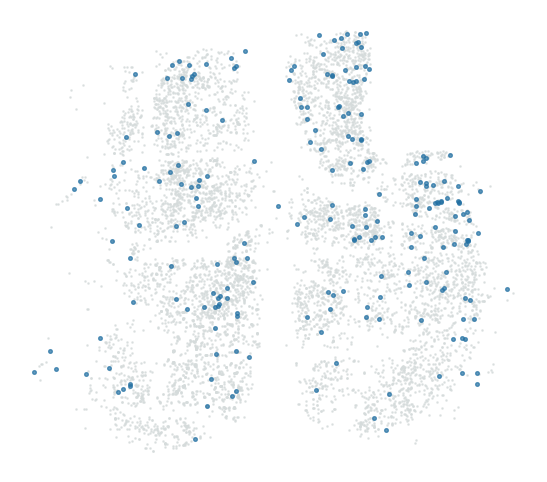

time 3080  -- selected neuron number: 168


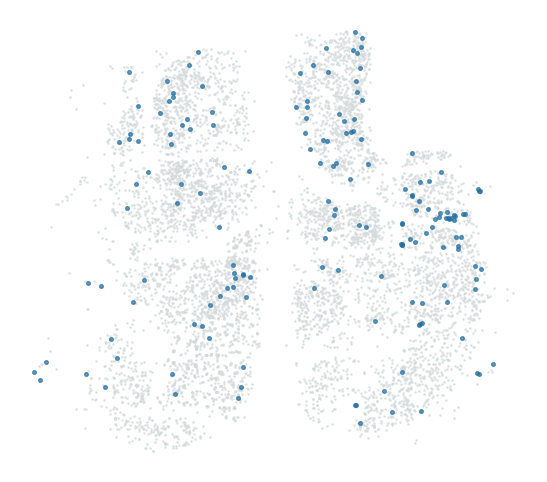

end


In [6]:
'''
statistics
'''

name = "burst"

## time evolution
bs_code_matrix_sum = np.sum(code_matrix, axis = 0)
bs_code_matrix_sum_bs = bs_code_matrix_sum[bs_time_idx]

x = range(len(bs_code_matrix_sum_bs))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, bs_code_matrix_sum_bs, color = "#A9CCE3")
plt.plot(bs_code_matrix_sum_bs, "-", color = "#1F618D", linewidth = 0.5)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Neuron number", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_" + name + ".pdf", bbox_inches='tight')
plt.show()


## active times
times_max = 14  ## change this parameter
code_matrix_type = np.sum(code_matrix, axis = 1)
code_matrix_type_cnt = []
for i in range(1, len(bs_code_matrix_sum_bs) + 1):
    cnt = list(code_matrix_type).count(i)
    code_matrix_type_cnt.append(cnt)

x = range(times_max)
print("code_matrix_type_cnt length:", len(code_matrix_type_cnt))
y = [code_matrix_type_cnt[i] / sum(code_matrix_type_cnt) for i in range(times_max - 1)]
y.append(sum(code_matrix_type_cnt[times_max - 1:]) / sum(code_matrix_type_cnt))
print("y:", y)

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, y, color = "#A9CCE3", edgecolor = "#1F618D", linewidth = 0.5)
plt.ylabel("Ratio", fontsize = 14)
plt.xlabel("Active times", fontsize = 14)
# plt.xlim((-0.05, 650))
plt.savefig(res_path + "neurons/neurons_active_code_ratio_" + name + "_selfAvg.pdf", bbox_inches='tight')
plt.show()


## brain map 
cnt = 0
cnt_list = []
for start in bs_time_range:   
    select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    print("time", start, " -- selected neuron number:", len(select_data_ids))

    ## pos
    neurons_x_only = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y_only = [valid_neuron_y[i] for i in select_data_ids]
    
    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x_only, neurons_y_only, s = 7, c = "#2471A3", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.png", bbox_inches='tight')
    plt.show()
    
print("end")

only_bs_ids: 2331
bs_and_ane_ids: 1876
------------------ only-type neurons ----------------------


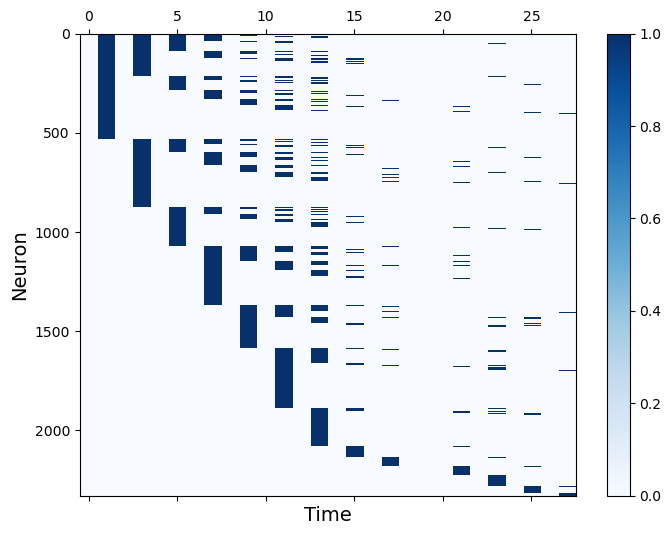

(2331,)


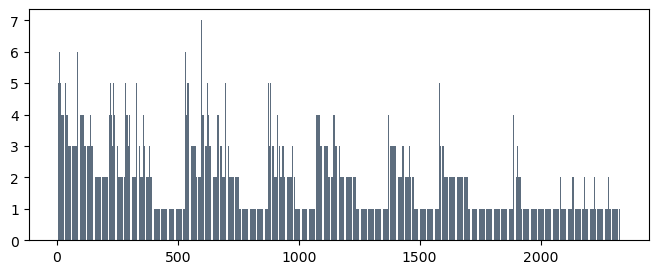

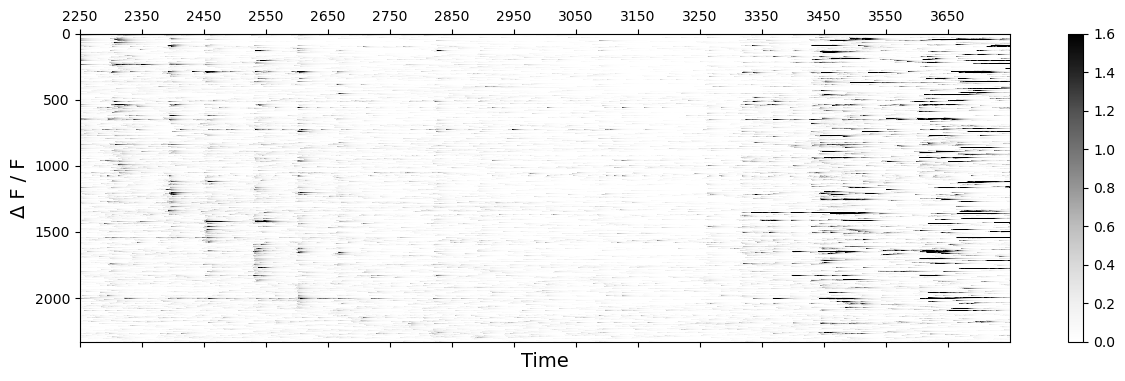

------------------ both-type neurons ----------------------


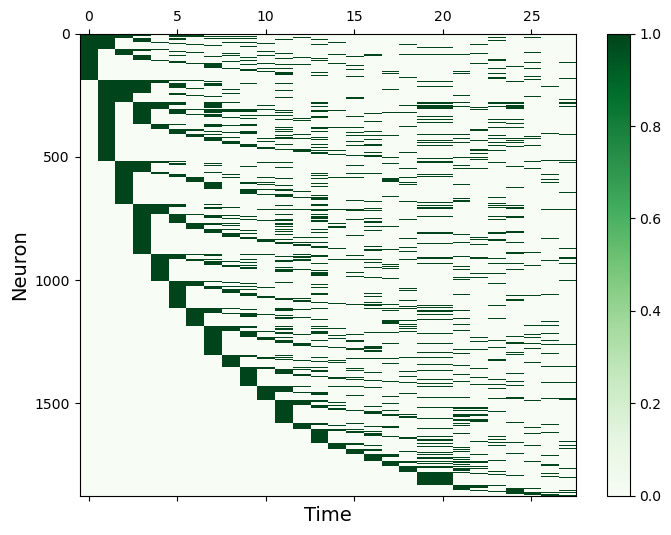

(1876,)


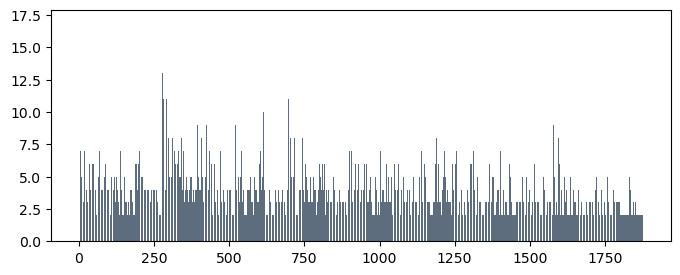

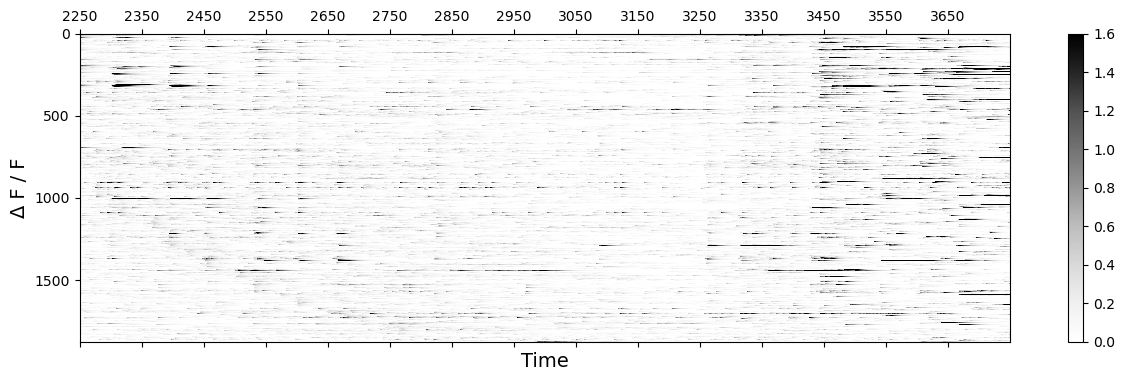

end


In [7]:
'''
detailed category
'''

name = "burst"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(bs_active_idx) == 0:
        continue
    if len(ane_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids)) 

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_only_bs = np.sum(code_matrix_only_bs, axis = 1)
print(code_matrix_sum_only_bs.shape)
x = range(len(code_matrix_sum_only_bs))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_only_bs,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_bs_ane = np.sum(code_matrix_bs_ane, axis = 1)
print(code_matrix_sum_bs_ane.shape)
x = range(len(code_matrix_sum_bs_ane))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_bs_ane,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


code_matrix_only_bs_sum_bs: (14,)


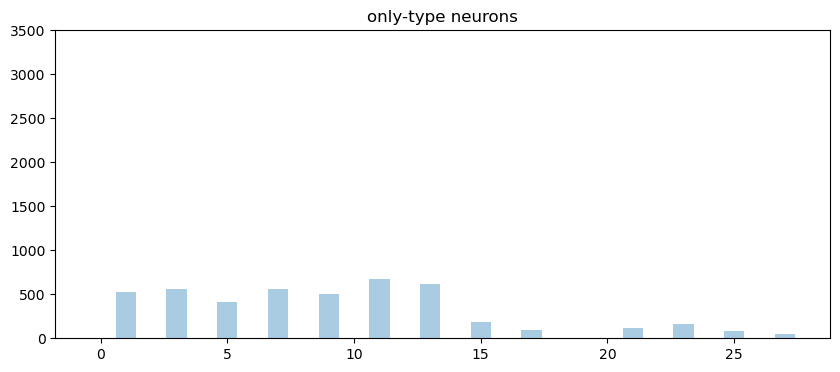

code_matrix_bs_ane_sum_bs_all: (28,)


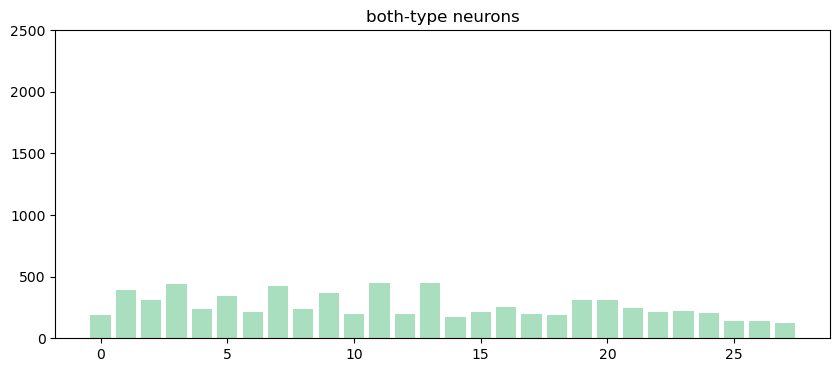

In [8]:
'''
further statistics
'''

## only-type neurons along time
code_matrix_only_bs_sum = np.sum(code_matrix_only_bs, axis = 0)
code_matrix_only_bs_sum_bs = code_matrix_only_bs_sum[bs_time_idx]
print("code_matrix_only_bs_sum_bs:", code_matrix_only_bs_sum_bs.shape)

data = [0] * len(bs_ane_time_range)
for i in range(len(bs_time_idx)):
    data[bs_time_idx[i]] = code_matrix_only_bs_sum_bs[i]
    
x = range(len(data))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, data, color = "#A9CCE3")#, edgecolor = "#2471A3")
plt.ylim((0,3500))
plt.title("only-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_burst.pdf", bbox_inches='tight')
plt.show()

## both-type neurons along time 
code_matrix_bs_ane_sum = np.sum(code_matrix_bs_ane, axis = 0)
code_matrix_bs_ane_sum_bs_all = code_matrix_bs_ane_sum
print("code_matrix_bs_ane_sum_bs_all:", code_matrix_bs_ane_sum_bs_all.shape)

x = range(len(code_matrix_bs_ane_sum_bs_all))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, code_matrix_bs_ane_sum_bs_all, color = "#A9DFBF")
plt.ylim((0,2500))
plt.title("both-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_both_burst_supp.pdf", bbox_inches='tight')
plt.show()



# 03 supp neurons

select_data_ids: 3577 <class 'numpy.ndarray'>


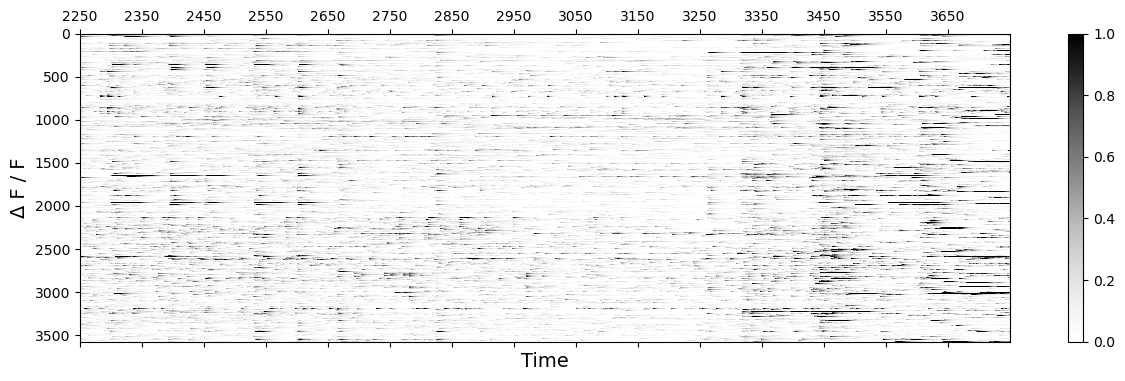

code_list: 3577
sort_id: 3577
sort_id: 3215
select_data_ids_sort: 3215
calc_rec: (3215, 1500)


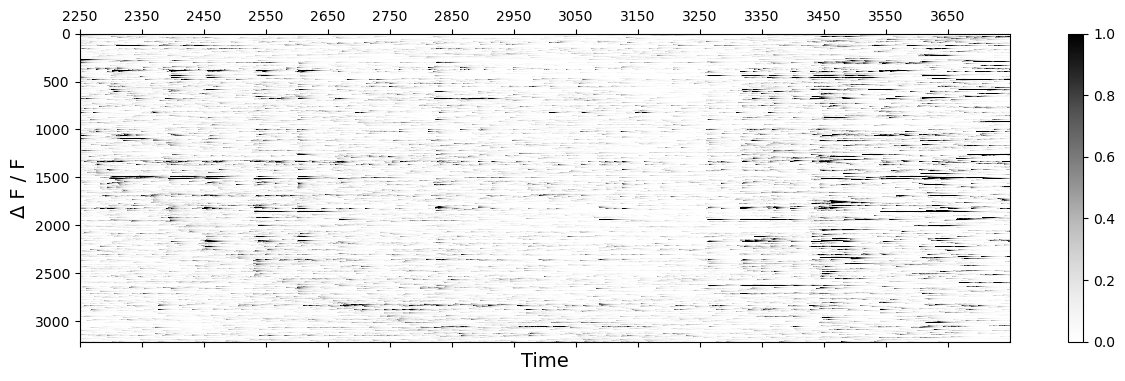

3215 28


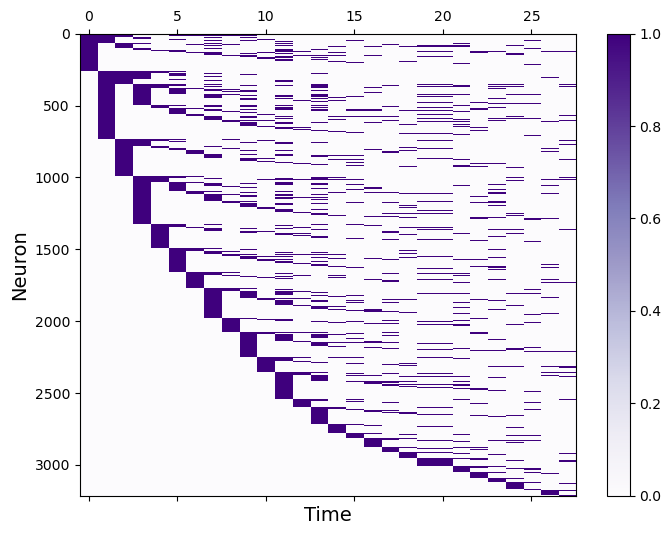

In [9]:
'''
supp neurons
'''
name = "supp"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort supp neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
    
'''
supp code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]

    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()



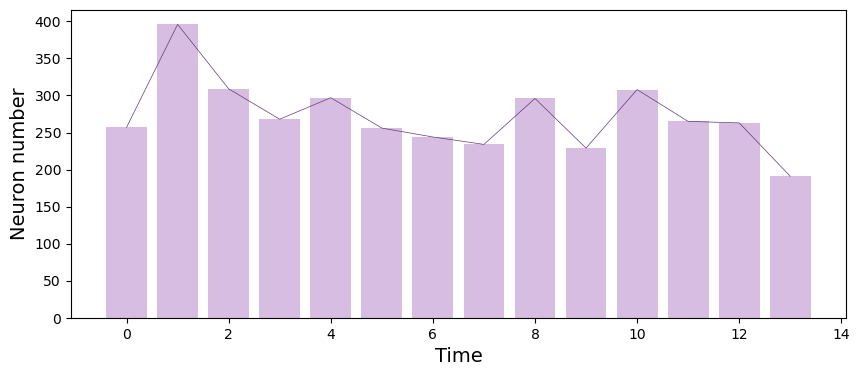

y: [0.22775357809583074, 0.238954573739888, 0.2075295581829496, 0.13939016801493467, 0.08369632856253889, 0.042314872433105166, 0.030802738021157437, 0.013067828251400125, 0.007778469197261979, 0.004667081518357187, 0.0028002489110143126, 0.0009334163036714375, 0.00031113876789047915, 0.0]


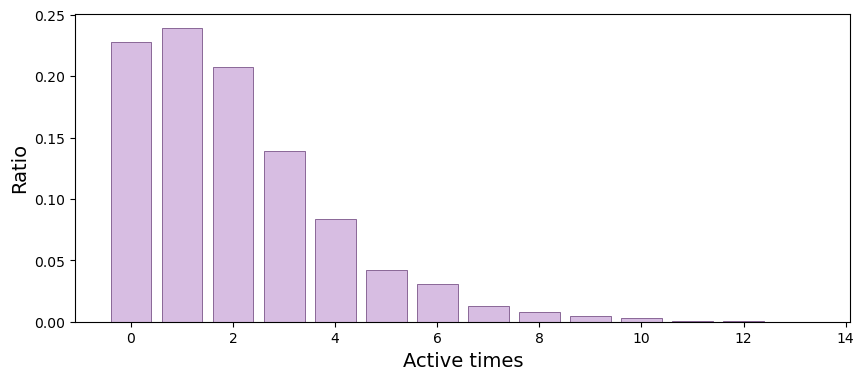

time 2115  -- selected neuron number: 257


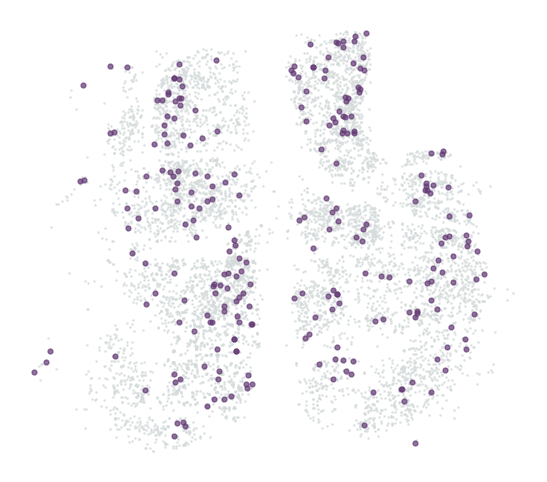

time 2191  -- selected neuron number: 396


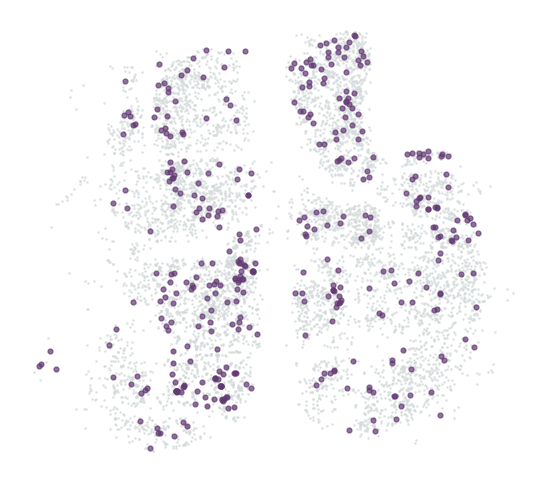

time 2275  -- selected neuron number: 309


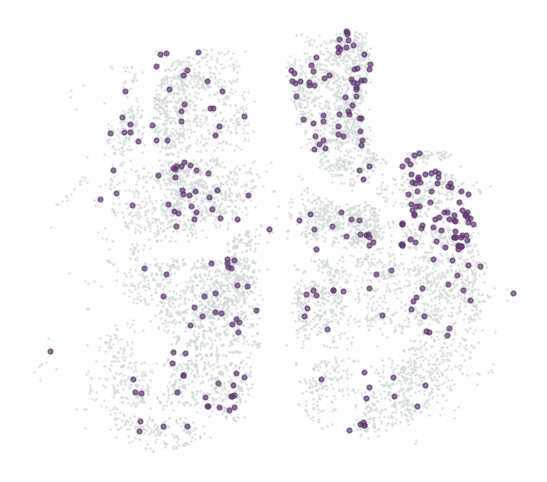

time 2367  -- selected neuron number: 268


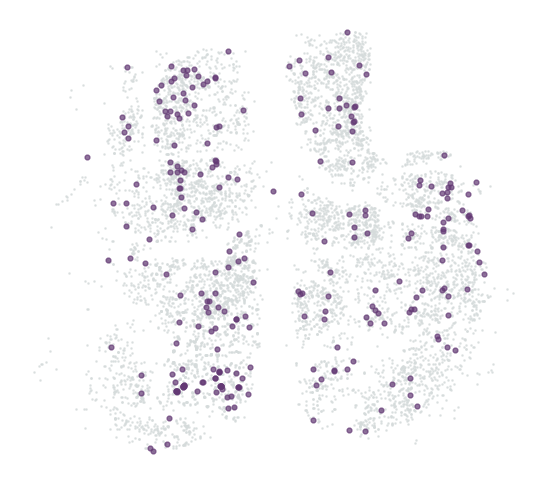

time 2425  -- selected neuron number: 297


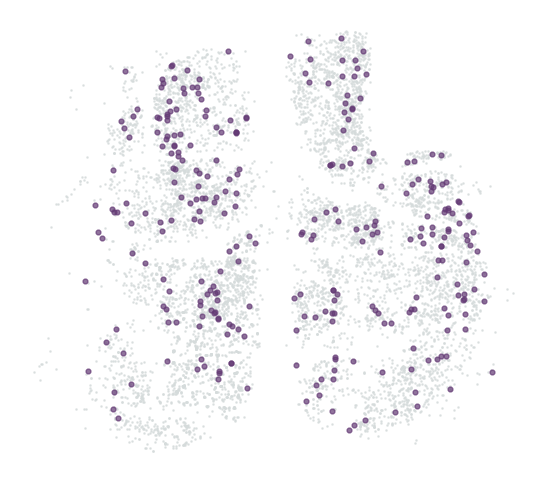

time 2505  -- selected neuron number: 256


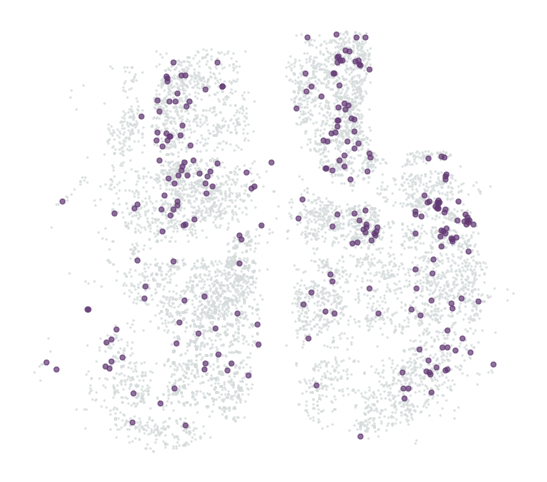

time 2576  -- selected neuron number: 244


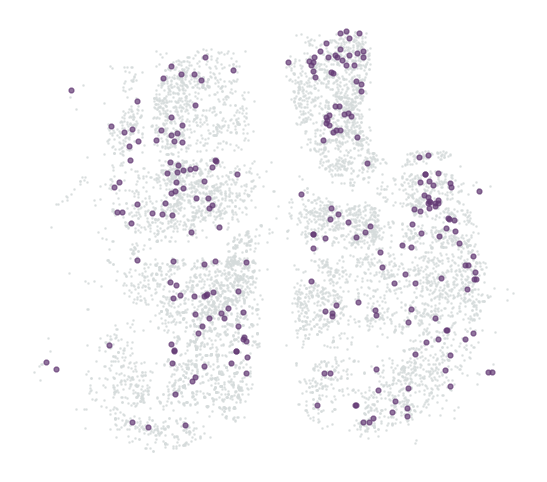

time 2638  -- selected neuron number: 234


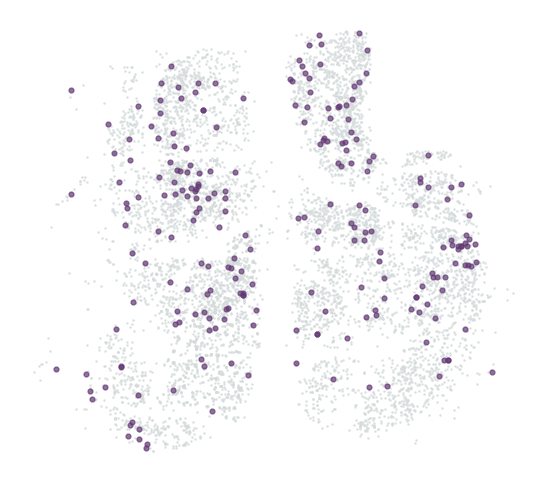

time 2680  -- selected neuron number: 296


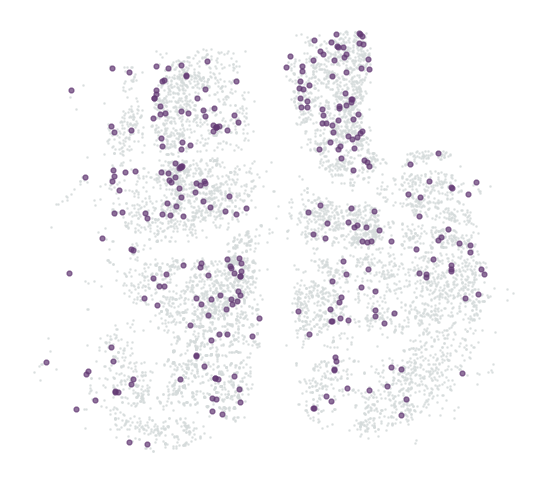

time 2748  -- selected neuron number: 229


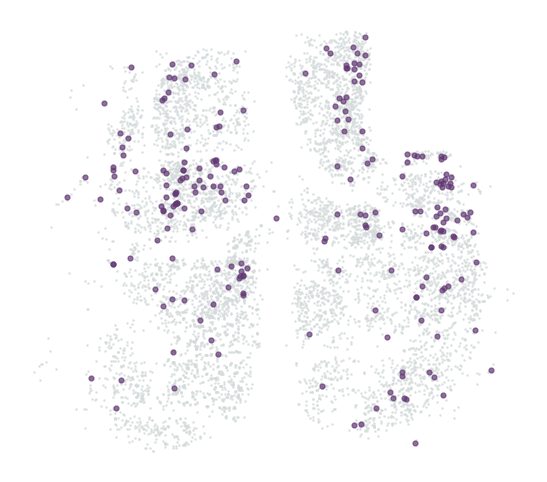

time 2763  -- selected neuron number: 308


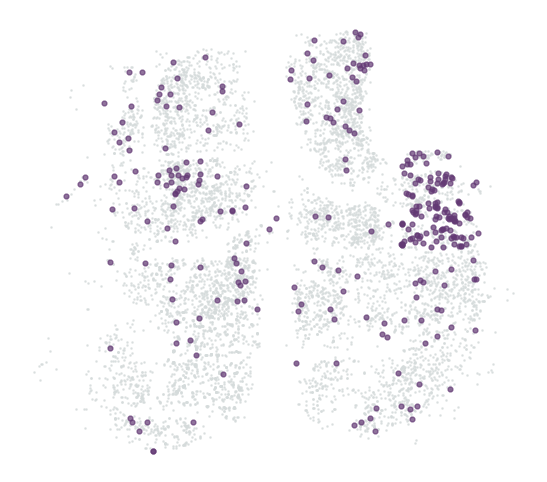

time 2798  -- selected neuron number: 265


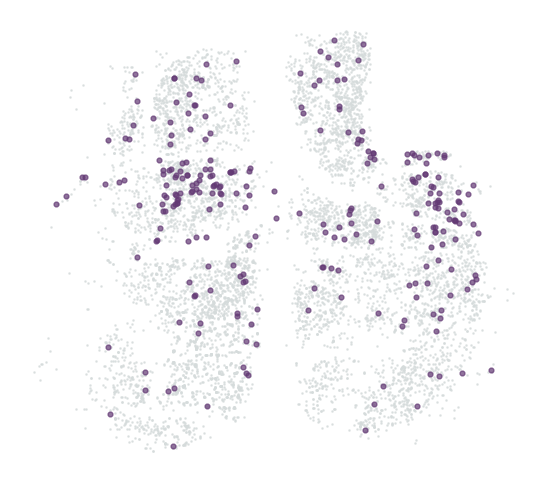

time 2865  -- selected neuron number: 263


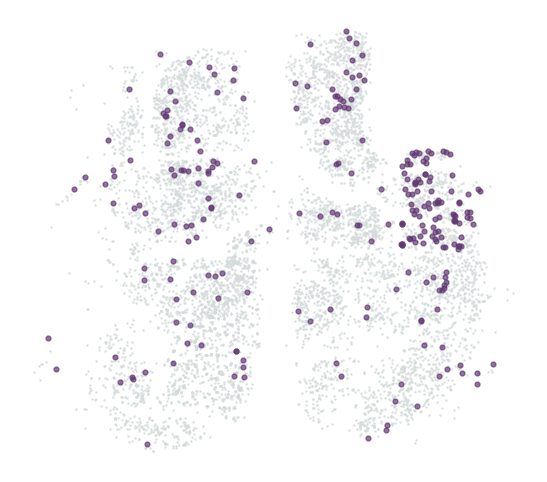

time 3062  -- selected neuron number: 191


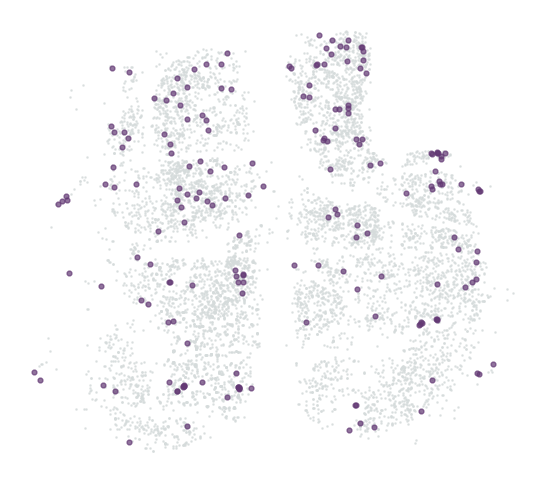

end


In [10]:
'''
statistics
'''

name = "supp"

## time evolution
bs_code_matrix_sum = np.sum(code_matrix, axis = 0)
bs_code_matrix_sum_bs = bs_code_matrix_sum[ane_time_idx]

x = range(len(bs_code_matrix_sum_bs))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, bs_code_matrix_sum_bs, color = "#D7BDE2")
plt.plot(bs_code_matrix_sum_bs, "-", color = "#633974", linewidth = 0.5)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Neuron number", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_" + name + ".pdf", bbox_inches='tight')
plt.show()


## active times
times_max = 14  ## change this parameter
code_matrix_type = np.sum(code_matrix, axis = 1)
code_matrix_type_cnt = []
for i in range(1, len(bs_code_matrix_sum_bs) + 1):
    cnt = list(code_matrix_type).count(i)
    code_matrix_type_cnt.append(cnt)

x = range(times_max)
y = [code_matrix_type_cnt[i] / sum(code_matrix_type_cnt) for i in range(times_max - 1)]
y.append(sum(code_matrix_type_cnt[times_max - 1:]) / sum(code_matrix_type_cnt))
print("y:", y)

fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, y, color = "#D7BDE2", edgecolor = "#633974", linewidth = 0.5)
plt.ylabel("Ratio", fontsize = 14)
plt.xlabel("Active times", fontsize = 14)
# plt.xlim((-0.05, 650))
plt.savefig(res_path + "neurons/neurons_active_code_ratio_" + name + "_selfAvg.pdf", bbox_inches='tight')
plt.show()


## brain map 
cnt = 0
cnt_list = []
for start in ane_time_range:   
    select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg.npy")
    print("time", start, " -- selected neuron number:", len(select_data_ids))

    ## pos
    neurons_x_only = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y_only = [valid_neuron_y[i] for i in select_data_ids]
    
    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x_only, neurons_y_only, s = 12, c = "#633974", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_" + name + "_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.png", bbox_inches='tight')
    plt.show()
    
print("end")

only_bs_ids: 577
bs_and_ane_ids: 1876
------------------ only-type neurons ----------------------


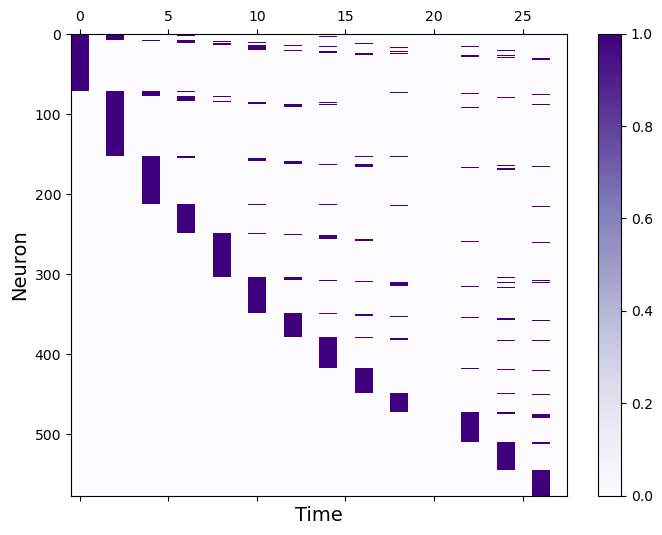

(577,)


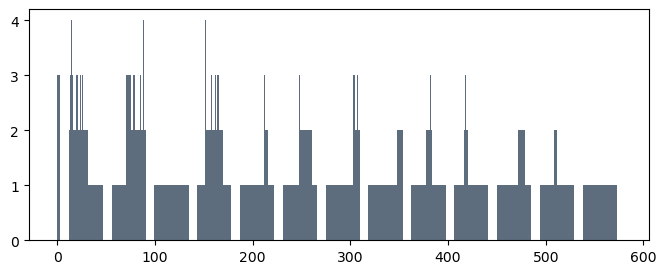

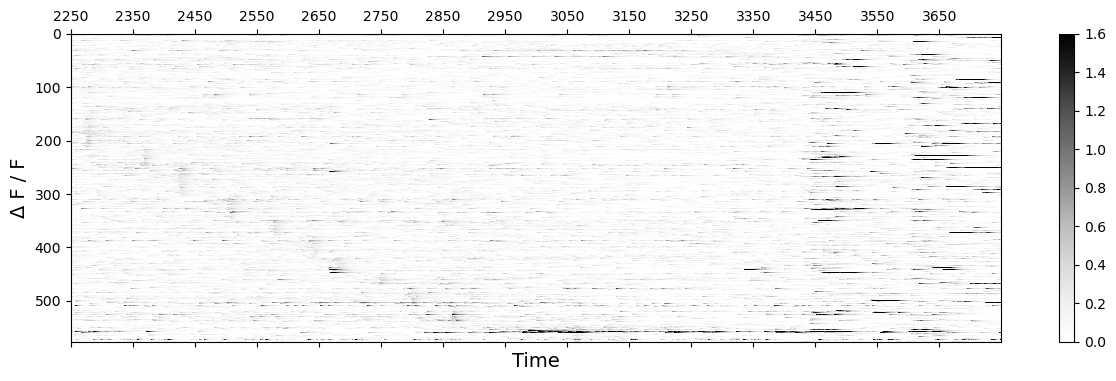

------------------ both-type neurons ----------------------


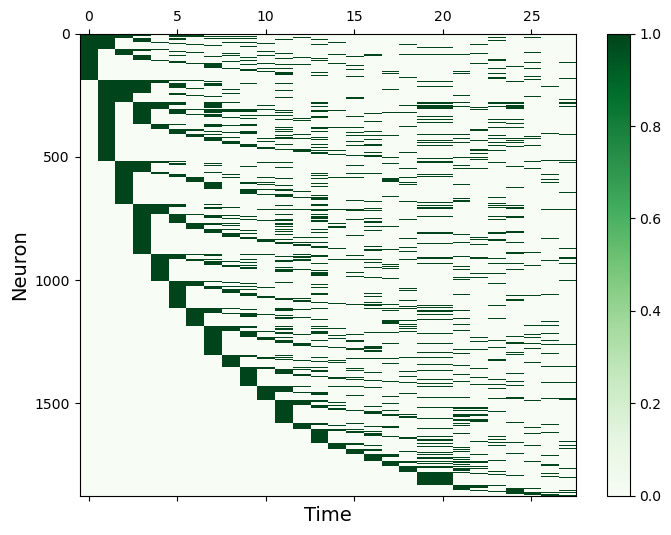

(1876,)


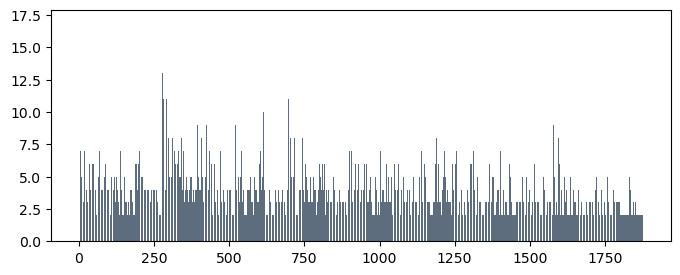

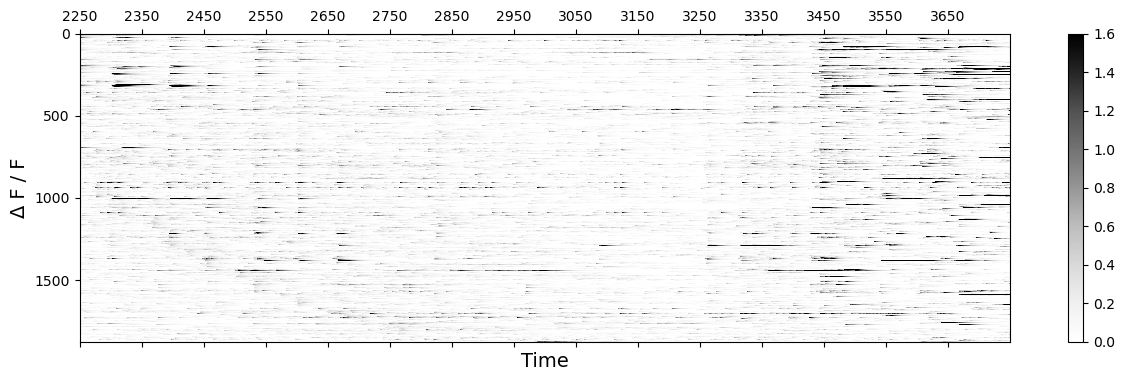

end


In [11]:
'''
detailed category
'''

name = "supp"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(ane_active_idx) == 0:
        continue
    if len(bs_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids))  

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_only_bs = np.sum(code_matrix_only_bs, axis = 1)
print(code_matrix_sum_only_bs.shape)
x = range(len(code_matrix_sum_only_bs))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_only_bs,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

code_matrix_sum_bs_ane = np.sum(code_matrix_bs_ane, axis = 1)
print(code_matrix_sum_bs_ane.shape)
x = range(len(code_matrix_sum_bs_ane))
fig,ax = plt.subplots(figsize=(8,3), dpi=100, facecolor="w")
plt.bar(x, code_matrix_sum_bs_ane,color = "#5D6D7E", width = 0.8)
plt.savefig(res_path + "neurons/active_times_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


code_matrix_only_bs_sum_bs: (14,)


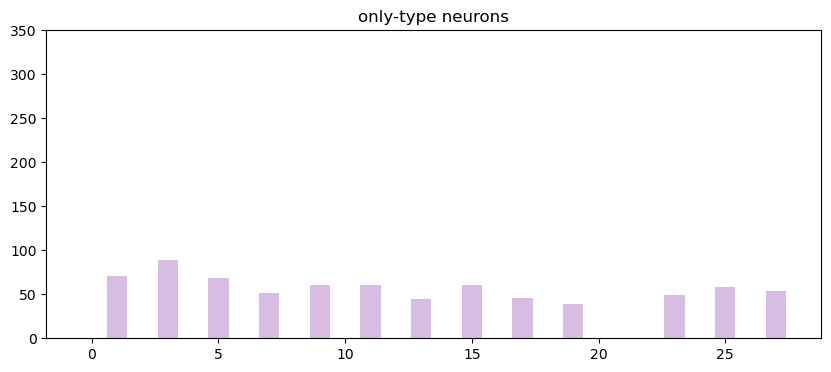

code_matrix_bs_ane_sum_bs_all: (28,)


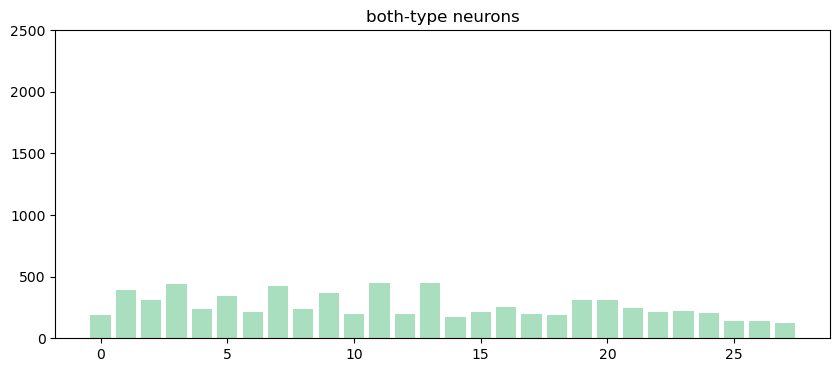

In [12]:
'''
further statistics
'''

## only-type neurons along time
code_matrix_only_bs_sum = np.sum(code_matrix_only_bs, axis = 0)
code_matrix_only_bs_sum_bs = code_matrix_only_bs_sum[ane_time_idx]
print("code_matrix_only_bs_sum_bs:", code_matrix_only_bs_sum_bs.shape)

data = [0] * len(bs_ane_time_range)
for i in range(len(ane_time_idx)):
    data[bs_time_idx[i]] = code_matrix_only_bs_sum_bs[i]
    
x = range(len(data))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, data, color = "#D7BDE2")#, edgecolor = "#2471A3")
plt.ylim((0,350))
plt.title("only-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_only_supp.pdf", bbox_inches='tight')
plt.show()

## both-type neurons along time 
code_matrix_bs_ane_sum = np.sum(code_matrix_bs_ane, axis = 0)
code_matrix_bs_ane_sum_bs_all = code_matrix_bs_ane_sum
print("code_matrix_bs_ane_sum_bs_all:", code_matrix_bs_ane_sum_bs_all.shape)

x = range(len(code_matrix_bs_ane_sum_bs_all))
fig,ax = plt.subplots(figsize=(10,4), dpi=100, facecolor="w")
plt.bar(x, code_matrix_bs_ane_sum_bs_all, color = "#A9DFBF")#, edgecolor = "#2471A3")
plt.ylim((0,2500))
plt.title("both-type neurons")
plt.savefig(res_path + "neurons/neurons_active_code_selfAvg_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

